### Gmarket
- 베스트 상품 200개 데이터 수집
- 상품의 이미지 200개 다운로드

In [2]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

#### 1. URL 찾기

In [3]:
url = 'https://www.gmarket.co.kr/n/best'

#### 2. request > response : str(html)

In [15]:
response = requests.get(url)
response

<Response [200]>

In [16]:
dom = BeautifulSoup(response.text, 'html.parser')

In [22]:
# 200개 상품 선택 : select()
elements = dom.select('#gBestWrap > div.best-list > ul > li')

In [27]:
# 1개 추출
element = elements[0]
data = {'title': element.select_one('.itemname').text,
       'img' :'http:' + element.select_one('.image__lazy').get('src'),
       'price': element.select_one('.s-price').text}

data

{'title': '[빕스](빕스) 15 000원 스프링 바우처  / 3월 19일부터 사용가능',
 'img': 'http://gdimg.gmarket.co.kr/3598240685/still/300?ver=1710138759',
 'price': '할인가1,500원 90%'}

#### 3. bs > DataFrame

In [28]:
items = []

for element in elements:
    data = {'title': element.select_one('.itemname').text,
       'img' :'http:' + element.select_one('.image__lazy').get('src'),
       'price': element.select_one('.s-price').text}
    items.append(data)

In [30]:
df = pd.DataFrame(items)
df

,title,img,price
0,[빕스](빕스) 15 000원 스프링 바우처 / 3월 19일부터 사용가능,http://gdimg.gmarket.co.kr/3598240685/still/30...,"할인가1,500원 90%"
1,[CJ제일제당](CJ제일제당) 맛밤 50g40봉 (1박스),http://gdimg.gmarket.co.kr/2527359115/still/30...,"할인가40,000원"
2,[펩시]펩시콜라 제로슈거 라임 355ml 48캔,http://gdimg.gmarket.co.kr/3162898676/still/30...,"할인가36,250원 13%"
3,[온더바디]온더바디 발을씻자 코튼풋샴푸 자몽향 385ml 4개,http://gdimg.gmarket.co.kr/1776265578/still/30...,"할인가19,900원 35%"
4,((단하루 10%+10%쿠폰)) 시크릿무드 역마진 파격SALE/바람막이/자켓/원피스...,http://gdimg.gmarket.co.kr/3602543561/still/30...,"할인가9,900원 70%"
...,...,...,...
195,[대상웰라이프]뉴케어 미니 구수한맛 150ml(24입),http://gdimg.gmarket.co.kr/3016672563/still/30...,"할인가29,900원"
196,(특가) 스마일북스 베스트 차일드애플 1 2 : 옵션선택 유아 창작동화 그림책 베...,http://gdimg.gmarket.co.kr/2969215115/still/30...,"할인가34,560원 46%"
197,[에그머니](에그머니) 온라인게임상품권 5만원,http://gdimg.gmarket.co.kr/2489152742/still/30...,"할인가45,750원 8%"
198,[닥터제니]2.4만+증정)닥터제니 1450 고불소 주니어치약 4개 (사과자두+오렌지...,http://gdimg.gmarket.co.kr/2887262214/still/30...,"할인가26,940원 51%"


#### 4. download image

In [33]:
link = df.loc[0, 'img']

In [34]:
link

'http://gdimg.gmarket.co.kr/3598240685/still/300?ver=1710138759'

In [35]:
response = requests.get(link)
response

<Response [200]>

In [37]:
with open('data.png', 'wb') as file:
    file.write(response.content)

In [38]:
%ls data.png

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: FCA9-41A6

 C:\Users\User\protect\crawling\c_2 디렉터리

03/19/2024  09:16 PM             9,771 data.png
               1개 파일               9,771 바이트
               0개 디렉터리  158,685,708,288 바이트 남음


In [39]:
# pillow : 이미지 전처리 패키지
from PIL import Image as pil

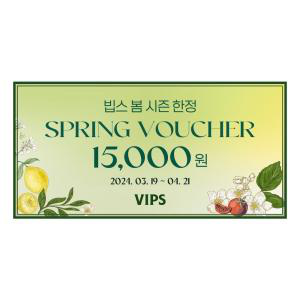

In [42]:
pil.open('data.png')